Math 5750/6880: Mathematics of Data Science \
Project 3

# 1. Fashion-MNIST image classification using sklearn

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(len(X_train), -1)
X_test  = X_test.reshape(len(X_test), -1)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import time
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score

In [8]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

modify hidden_layer_sizes, activation_functions, solver, learning_rate, learning_rate_init, alpha, early_stopping

In [4]:
# 1 hidden layer with 100 neurons
# adam optimizer, early_stopping is true

mlp = MLPClassifier(
    hidden_layer_sizes=100,
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate='constant',
    learning_rate_init=0.001,
    # verbose=True,
    early_stopping=True,
)

start = time.time()
mlp.fit(X_train, y_train)
end = time.time()
training_time = end - start
print(f"Training time: {training_time:.2f} seconds")

Training time: 44.54 seconds


In [5]:
y_pred = mlp.predict(X_test)
y_proba = mlp.predict_proba(X_test) # auc

In [9]:
# training and convergence

print(f"Model converged in {mlp.n_iter_} epochs (max_iter was {mlp.max_iter}).")
print(f"Final training loss: {mlp.loss_:.4f}\n")

Model converged in 22 epochs (max_iter was 200).
Final training loss: 0.1127



In [10]:
# classification result

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=class_names)
print(f"Accuracy: {acc:.4f}")
print(report)

Accuracy: 0.8804
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.85      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.80      0.80      1000
       Dress       0.86      0.91      0.89      1000
        Coat       0.79      0.83      0.81      1000
      Sandal       0.94      0.97      0.95      1000
       Shirt       0.72      0.63      0.67      1000
     Sneaker       0.93      0.94      0.94      1000
         Bag       0.97      0.96      0.97      1000
  Ankle boot       0.97      0.93      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [12]:
# roc score (one vs rest for multi-class classification)

auc_macro = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')

auc_weighted = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')

print(f"AUC (macro): {auc_macro:.4f}")
print(f"AUC (weighted): {auc_weighted:.4f}")

AUC (macro): 0.9903
AUC (weighted): 0.9903


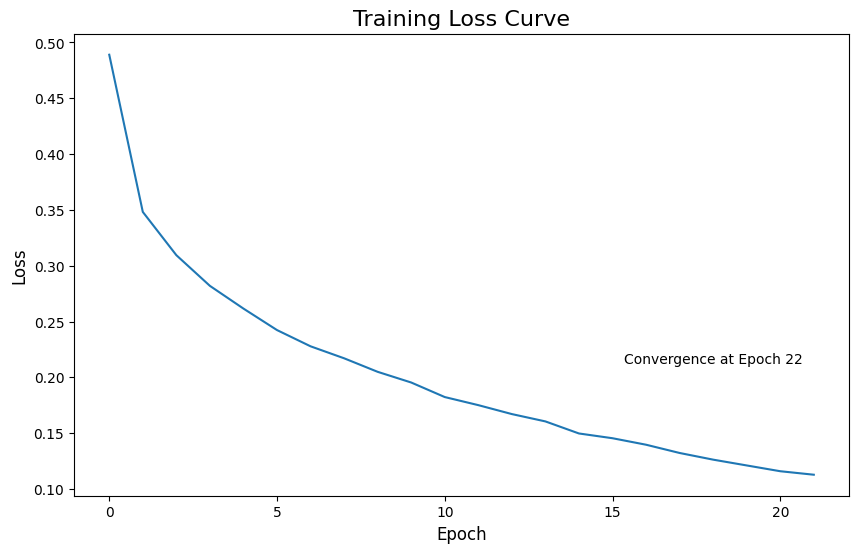

In [33]:
# training loss curve

plt.figure(figsize=(10,6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss Curve', fontsize=16)
# plt.grid(True)
plt.annotate(
    f'Convergence at Epoch {mlp.n_iter_}',
    xy=(mlp.n_iter_, mlp.loss_curve_[-1]),
    xytext=(mlp.n_iter_ - 4, mlp.loss_curve_[-1] + 0.1),
    # arrowprops=dict(facecolor='black', shrink=0.05),
    horizontalalignment='center',
)
plt.show()

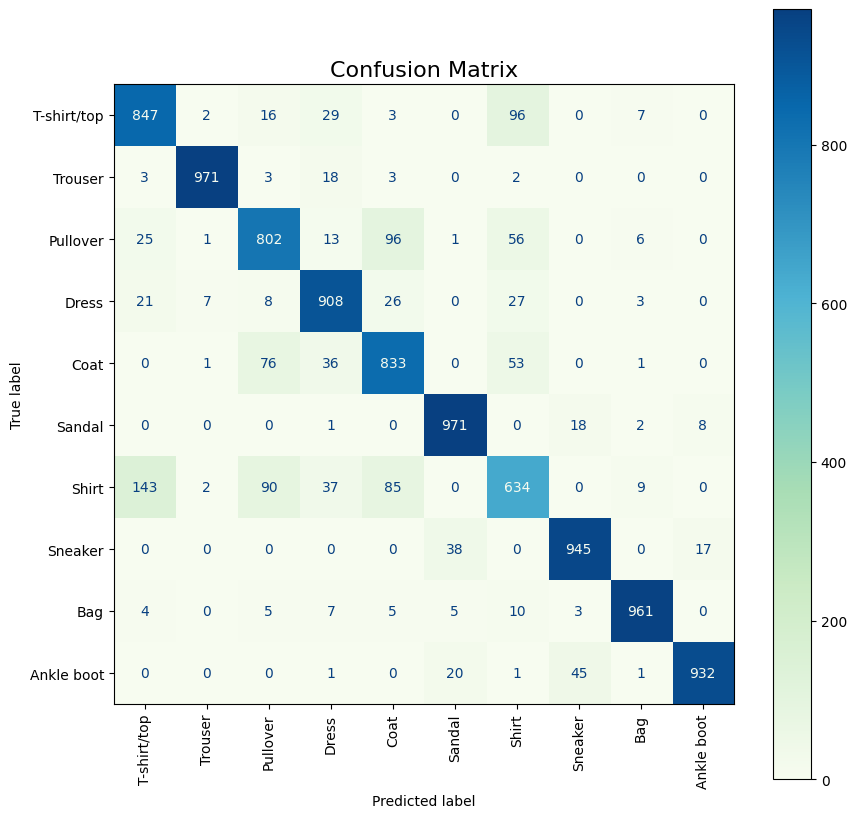

In [39]:
# confusion matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.GnBu, ax=ax, xticks_rotation='vertical')
plt.title("Confusion Matrix", fontsize=16)
plt.show()


# 3. Fashion-MNIST image classification  using pytorch

In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# scale to [0,1], add channel dimension -> (N, 1, 28, 28)
X_train = (X_train.astype("float32") / 255.0)[:, None, :, :]
X_test  = (X_test.astype("float32")  / 255.0)[:,  None, :, :]

y_train = y_train.astype(np.int64)
y_test  = y_test.astype(np.int64)

# train/val split: last 10k of train as validation
X_tr, X_val = X_train[:50000], X_train[50000:]
y_tr, y_val = y_train[:50000], y_train[50000:]

# wrap in PyTorch TensorDatasets and DataLoaders
train_ds = TensorDataset(torch.from_numpy(X_tr),  torch.from_numpy(y_tr))
val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_ds  = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False)

In [ ]:
import torch.nn as nn
import torch.optim as optim

# In colab, you should ``change runtime type'' to GPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# your code here